1. Generating pseudo-random data around the random line y = kx + b.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k = 9
b = 11

x = np.linspace(0, 3, 500)
y = k*x+b + np.random.normal(0, 3, 500)
data = pd.DataFrame({'X': x, 'Y': y})

2. Visualising data.

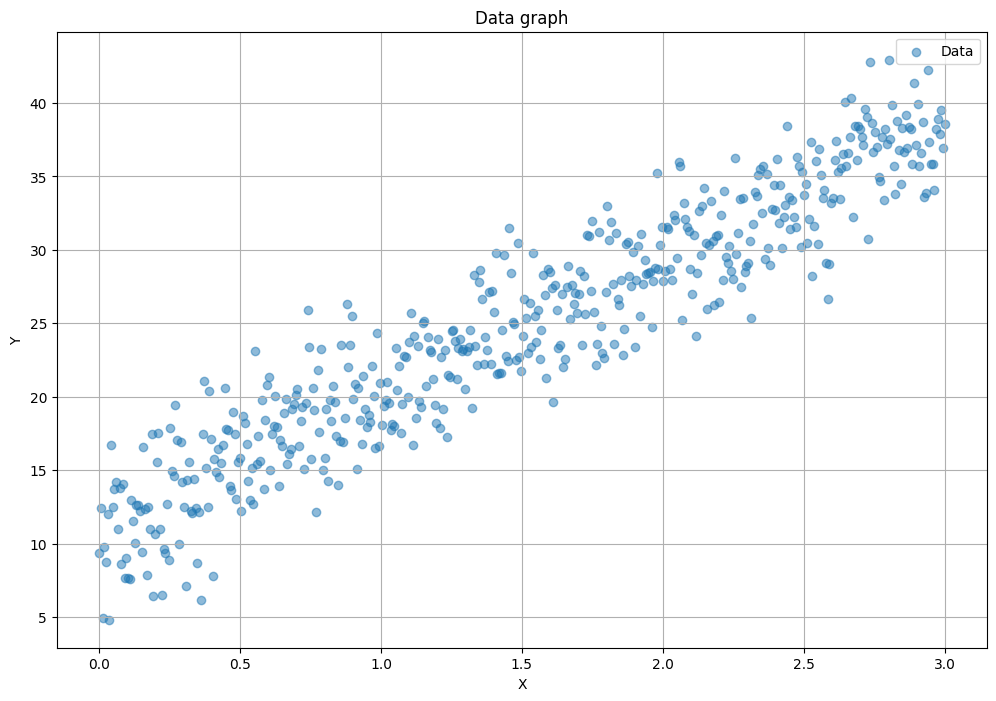

In [2]:
plt.figure(figsize=(12, 8))
plt.scatter(data.X, data.Y, alpha=0.5, label='Data')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data graph')
plt.grid(True)

plt.show()

3. Using the Least Squares Method to Construct a Regression Line.

In [3]:
def sqmeth(x, y):
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)

    sum1 = sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y))
    sum2 = sum((xi - x_mean) ** 2 for xi in x)

    k = sum1 / sum2
    b = y_mean - k * x_mean

    return k, b

print(f"Initial value k: {k}")
print(f"Initial value b: {b} \n")

k_LSM, b_LSM = sqmeth(data.X, data.Y)
print(f"Optimal k value estimate (LSM): {k_LSM}")
print(f"Optimal b value estimate (LSM): {b_LSM} \n")

k_POLY, b_POLY = np.polyfit(data.X, data.Y, 1)
print(f"Optimal k value estimate (POLY): {k_POLY}")
print(f"Optimal b value estimate (POLY): {b_POLY} \n")

Initial value k: 9
Initial value b: 11 

Optimal k value estimate (LSM): 9.130569177748239
Optimal b value estimate (LSM): 11.081634043564108 

Optimal k value estimate (POLY): 9.130569177748232
Optimal b value estimate (POLY): 11.081634043564113 



4. Visualising Regression Lines.

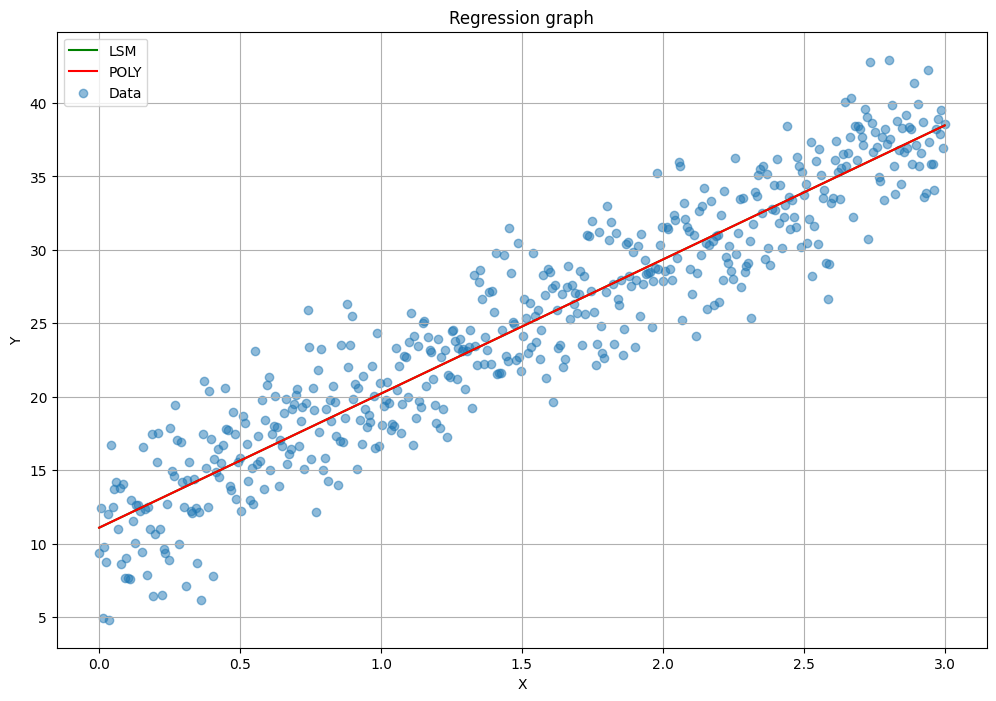

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(x, k_LSM*x+b_LSM, color='green', label='LSM')
plt.plot(x, k_POLY*x+b_POLY, color='red', label='POLY')
plt.scatter(data.X, data.Y, alpha=0.5, label='Data')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression graph')
plt.grid(True)

plt.show()

5. Using the Gradient Descent Method to Construct a Regression Line.

In [5]:
def graddesc(x, y, learning_rate, n_iter, stopper=0.00001):
    k = 0
    b = 0
    n = len(x)
    losses = []

    for _ in range(n_iter):
        predicted = k * x + b
        mse = np.mean((y - predicted) ** 2)
        losses.append(mse)

        gradient_k = (-2/n) * sum(x * (y - predicted))
        gradient_b = (-2/n) * sum(y - predicted)

        k = k - learning_rate * gradient_k
        b = b - learning_rate * gradient_b

        if len(losses) > 1 and abs(losses[-1] - losses[-2]) < stopper:
            break

    return k, b, losses

k_GRAD, b_GRAD, losses = graddesc(data.X, data.Y, 0.001, 15000)
print(f"Optimal k value estimate (GRAD): {k_GRAD}")
print(f"Optimal b value estimate (GRAD): {b_GRAD}")


Optimal k value estimate (GRAD): 9.249628445975455
Optimal b value estimate (GRAD): 10.858984259116523


6. Visualising new line.

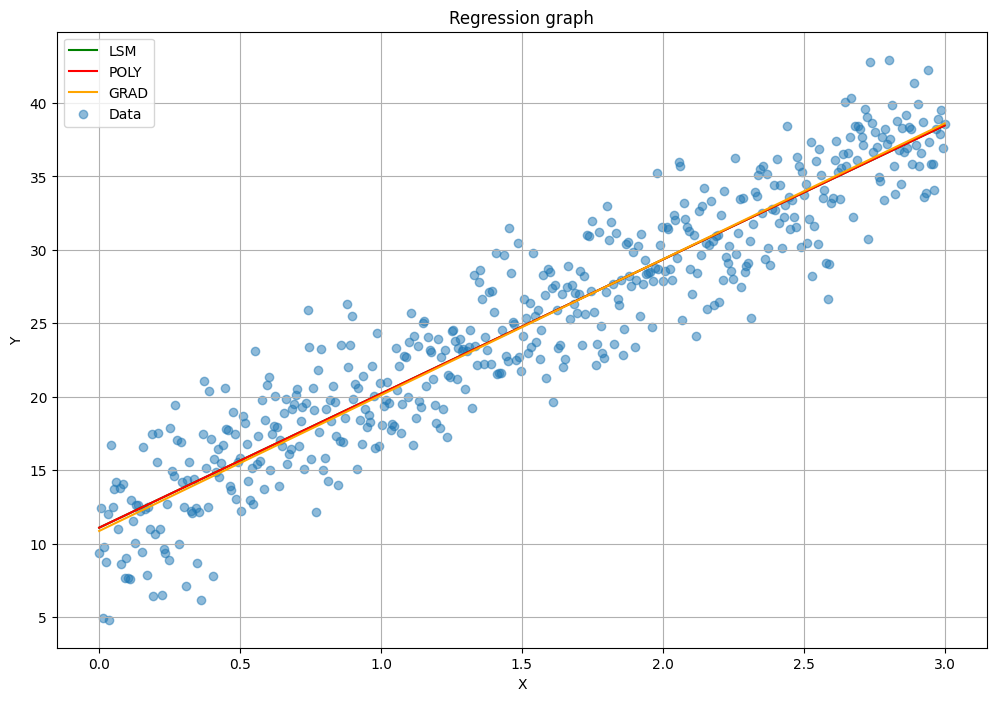

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(x, k_LSM*x+b_LSM, color='green', label='LSM')
plt.plot(x, k_POLY*x+b_POLY, color='red', label='POLY')
plt.plot(x, k_GRAD*x+b_GRAD, color='orange', label='GRAD')
plt.scatter(data.X, data.Y, alpha=0.5, label='Data')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression graph')
plt.grid(True)

plt.show()